<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Fastai/Notas_de_la_clase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 6 - Deep Learning for Coders**

# **Respuestas al cuestionario**

1. **¿Qué problemas resuelve el filtrado colaborativo?**

En la clase se dan como ejemplos, problemas mas orientados a sistemas de recomendaciones, en las cuales son los usuarios los que colocan una calificacion sobre algun item. 

Para el caso del notebook, se trabaja sobre una base de datos sobre calificaciones que colocaban los usuarios a distintas peliculas que habian visto. Asi, se pretende extraer de este modelo, un sistema de recomendaciones para las personas que aun no han visto una pelicula.

2. **¿Cómo lo resuelve?**

La manera en como estos lo resulven es la siguiente:
- Primero se plantea un set de factores tanto para los usuario como para los items, con los cuales se pretende dar alguna explicacion a la calificacion colocada.


- A partir de aqui se pueden desarrollar dos modelos:
  - El primero hace un cruce de estos factores haciendo un producto punto, luego suma un factor de sesgo (bias) y por ultimo se hace ajustar por un rango. Asi, con el metodo de SGD, cada uno de estos factores son actualizados en funcion de la perdida del modelo (MSE, por defecto).
  - El segundo modelo hace uso de redes neuronales (dos capas ajustables en su numero de parametros). Asi, estos dos set de parametros los transforma en un tensor y los hace pasar por el modelo. Este, al igual que el resto de los modelos de redes neuronales, tambien se trabaja con un optimizador (como SGD).

3. **¿Por qué un modelo predictivo de filtrado colaborativo puede no ser un sistema de recomendación muy útil?**

Quizas y volviendo a alguna de las respuestas de los notebooks anteriores. Estos estan construidos bajo la hipotesis de que la gente califica o compra en base a sus gustos, lo cual ya discutimos, esto no siempre es cierto.

4. **¿Qué aspecto tiene una representación de tabla de referencias cruzadas de datos de filtrado colaborativo?**

La representacion cruzada tiene como referencia a los usuarios en las filas y a los items en las columnas. Asi, los valores cruzados corresponden a las calificacion que da cada usuario sobre el item seleccionado.

5. **Escriba el código para crear una representación de tabla de referencias cruzadas de los datos de MovieLens (¡es posible que deba realizar una búsqueda en la web!).**

Este lo deje en el notebook.

6. **¿Qué es un factor latente? ¿Por qué está "latente"?**

Corresponde a un parametro con el cual se intenta explicar la manera en que un usuario coloca cierta calificacion sobre algun item. El que sea latente o no, guarda relacion al grado de impacto que pueda tener este factor sobre la calificacion del item.

7. **¿Qué es un producto escalar? Calcule un producto escalar manualmente usando Python puro con listas.**

Un producto escalar es la suma de la multiplicacion de los elementos de cada vector (respetando las posiciones)

```python
# definamos dos vectores
lista1 = [1, 2, 3, 4, 5, 6]
lista2 = [2, 4, 6, 8, 10, 12]

# el producto escalar vendria a ser lo siguiente
lista3 = []
for i in range(len(lista1)):
  lista3.append(lista1[i] * lista2[i])

producto_escalar = sum(lista3)
print(producto_escalar)
>> 182
```

8. **¿Qué hace `pandas.DataFrame.merge`?**

El metodo `merge` junta dos `DataFrames` mirando alguna columna en comun.

9. **¿A que se refiere con Embedding Matrix?**

Me parece que se esta refiriendo al producto entre vectores tipo one-hot encoding con las matrices que contienen los factores latentes y cuyas filas se encuentran ordenadas por un indice. (Para el caso del notebook, se utilizan dos de estas matrices, la primera hace referencia a los factores latentes de los usuarios y la segunda hace referencia a los factores latentes de las peliculas) 

10. **¿Cuál es la relación entre un Embedding y una matriz de vectores tipo one-hot encoding?**

En el cuaderno nos explican que la operacion de un Embedding es equivalente a realizar una multiplicacion matricial entre la matriz de factores (transpuesta) por el vector de one-hot enconding (vector lleno de ceros a excepcion del indice que indiquemos)


11. **¿Por qué necesitamos hacer un Embedding si podemos usar vectores tipo one-hot encoding para lo mismo?**

La razon principal es que este metodo necesita ocupar mas espacio de memoria para almacenar los vectores de one-hot encoding.

12. **¿Qué contiene un Embedding antes de que comencemos a entrenar (asumiendo que no estamos usando un modelo pre entrenado)?**

Contiene un numero de parametros igual al numero de factores latentes que especifiquemos para los usuarios y los items. Ademas, y dado que estamos trabajando con la biblioteca de Pytorch, debemos utilizar el metodo `nn.Parameter` para que asi el modelo luego sea capaz de actualizarlos con el proceso de SGD.


13. **Cree una clase (¡sin mirar a escondidas, si es posible!) Y úsela.**

```python
# Definiendo una clase de ejemplo
class registro():
  def __init__(self, historial={}):
    self.historial = historial
    self.cant_registros = len(self.historial)

  def sumar_registro(self, nombre, apellido, telefono):
    self.cant_registros += 1
    self.historial[self.cant_registros] = [nombre, apellido, telefono]    

  def mostrar_registros(self):
    print(self.historial)

# Ejemplo de usos
contactos = registro(historial={})

# Agreguemos registros
contactos.sumar_registro('Rodrigo', 'Araya', '9 66627482')
contactos.sumar_registro('Diego', 'Araya', '9 66627482')

# Mostramos los registros
contactos.mostrar_registros()
>> {1: ['Rodrigo', 'Araya', '9 66627482'], 2: ['Diego', 'Araya', '9 66627482']}
```

14. **¿Qué devuelve `x [:, 0]`?**

Mas abajo lo dejo mas claro (voy siguiendo el proceso paso a paso), pero en forma resumida el x va a contener 3 valores (usuario, item, calificacion). Asi, `x[:, 0]` esta tomando todos los id de usuarios del batch (de 64 por defecto).

15. **Vuelva a escribir la clase `DotProduct` (¡sin mirar, si es posible!) Y entrene un modelo con ella.**

```python
# importar bibliotecas
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

# resumen de los preparativos
path = untar_data(URLs.ML_100k)
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
ratings = ratings.merge(movies)
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

# ahora creamos la clase del producto punto
class producto_punto(Module):
  def __init__(self, cant_usuarios, cant_items, fact_usuario, fact_items):
    self.emb_usuario = Embedding(cant_usuarios, fact_usuario)
    self.emb_item = Embedding(cant_items, fact_items)
    self.emb_bias_usuario = Embedding(cant_usuarios, 1)
    self.emb_bias_item = Embedding(cant_items, 1)

  def forward(self, x):
    user_fact = self.emb_usuario(x[:, 0])
    item_fact = self.emb_item(x[:, 1])
    res = (user_fact*item_fact).sum(dim=1, keepdim=True)
    res += self.emb_bias_usuario(x[:, 0]) + self.emb_bias_item(x[:, 1])
    res = sigmoid_range(res, 0, 5.5)
    return res 

# veamos un batch
x, y = dls.one_batch()
print(x.shape)
>> torch.Size([64, 2])

# ahora llamemos a la clase
## parametros
cant_usuarios = len(dls.classes['user'])
cant_items = len(dls.classes['title'])
fact_usuario = 5 # utilicemos la misma cantidad de factores
fact_items = 5
funcion = producto_punto(cant_usuarios, cant_items, fact_usuario, fact_items)

# Ahora hagamos pasar el batch por la funcion
salida = funcion.forward(x)
print(salida.shape)
>> torch.Size([64, 1])

# Ahora entrenemos utilizando esta funcion
funcion = producto_punto(cant_usuarios, cant_items, fact_usuario, fact_items)
learn = Learner(dls, funcion, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)
```

16. **¿Cuál es una buena función de pérdida para utilizar con MovieLens? ¿Por qué?**

Una buena funcion de perdida que podemos utilizar para este modelo, es la MSE (promedio de los valores al cuadrado) o la L2 (promedio de los valores absolutos). Y la razon de porque utilizarlas, se debe principalmente a que estamos trabajando con valores continuos (como en una regresion).

17. **¿Qué pasaría si usáramos la pérdida de entropía cruzada con MovieLens? ¿Cómo necesitaríamos cambiar el modelo?**

No estoy seguro si con esto bastará, pero creo que el principal cambio que deberiamos hacer se encontraria en la salida. Ya que tenemos que cambiar el tensor de tamaño 1, por uno que se ajuste a las categorias de clasificacion 1 - 2 - 3 - 4 - 5, para este caso. 

18. **¿Cuál es el uso del sesgo en un modelo de producto escalar?**

Este se utiliza como un parametro suelto para indicar la tendencia de un usuario a calificar positiva o negativamente cualquier pelicula en general. Del mismo modo, se añade otro parametro suelto en las peliculas, el cual tambien puede capturar esa tendencia a que la pelicula sea bien recibida o mal recibida en general. Asi, este parametro adicional es caracteristico de cada usuario y de cada item, y lo que busca es capturar todo aquello que no logran explicar los factores latentes.

19. **¿Cuál es otro nombre para weight decay?**

L2 Regularization.

20. **Escribe la ecuación para la disminución del peso (¡sin mirar!).**

Sea $p_{i}$: los parametros del modelo (los pesos)

Entonces:
\begin{equation}
Loss_{new} = Loss_{old} + wd*\sum_{i} p_{i}^2
\end{equation}

21. **Escribe la ecuación para el gradiente del weight decay. ¿Por qué ayuda a reducir el peso?**

\begin{equation}
Grad(Loss_{new}) = Grad(Loss_{old}) + 2*wd*p_{i}
\end{equation}

Esto creo que queda mas claro en la ecuacion anterior. Y sucede que si el objetivo es siempre lograr obtener la menor perdida (Loss) posible, es que nos interesara hacer al termino $wd*\sum_{i} p_{i}^2$ lo mas cercano a cero (nota: wb > 0). En consecuencia, esto se traduce en trabajar con parametros p_{i} cercanos a cero.

22. **¿Por qué weight decay conduce a una mejor generalización?**

En este caso, lo que esta haciendo el weight decay es reducir el espacio factible que puede utilizar cada uno de los parametros.

23. **¿Qué hace `argsort` en PyTorch?**

El metodo argsort regresa los indices de un tensor, de forma, que sus valores esten ordenados de manera ascendente.

```python
lista = [1, 3, 4, 2, 5]
tensor = torch.Tensor(lista)
print(tensor)
>> tensor([1., 3., 4., 2., 5.])
print(torch.argsort(tensor))
>> tensor([0, 3, 1, 2, 4])
```

24. **¿La clasificación de los sesgos de películas da el mismo resultado que el promedio de calificaciones de películas por película? ¿Por qué por qué no?**

No lo creo y por una sencilla razon. El promedio de la clasificacion de una pelicula se obtiene de los datos reales, con lo cual, este valor es fijo y no variara en el tiempo. Por el contrario, el sesgo o bias para las pelicualas, son parametros que se van modificando en cada iteracion del modelo.

25. **¿Cómo imprime los nombres y detalles de las capas en un 
modelo?**

Solo face falta hacer un print en la funcion del modelo.

26. **¿Cuál es el "problema de bootstrapping " en el filtrado colaborativo?**

En el texto, se menciona este problema cuando intentamos generar recomenciones de peliculas a un usuario nuevo en la plataforma. Sucede que al ser un usuario nuevo, no tenemos idea de sus gustos o que tipo de peliculas a visto en el pasado.

27. **¿Cómo podría lidiar con el problema del bootstrapping para los nuevos usuarios? ¿Para nuevas películas?**

En le caso de los nuevos usuarios, se podria hacer que en el registro de la plataforma, se le solicite al usuario un minimo de informacion para asi generar las recomendaciones. Luego, ha medida que este usario se vaya interiorizando con la plataforma y vaya genrarndo sus clasificaciones, es que se podra utilizar un sistema de recomendacion como el visto en esta clase.

28. **¿Cómo pueden los feedback loops impactar los sistemas de filtrado colaborativo?**

En la clase se da a entender que si, por ejemplo, a un grupo de usuarios les gusta una mismo genero de peliculas y estos a su vez tienen la tendencia a reseñar un mayor numero de veces y con buenas reseñas a este tipo de genero, lo mas probable es que en el sistema se genere un feedback loop con tendencia a este tipo de genero, ya que, aparentemente es a lo que la mayoria le gusta.

29. **Al usar una red neuronal en el filtrado colaborativo, ¿por qué podemos tener diferentes números de factores para películas y usuarios?**

La razon es muy sencilla, y es que para hacer el producto punto es necesario contar con dos vectores con la misma cantidad de parametros. Para el caso de las redes neuronales no, ya que estos dos vectores son concatenados en uno y luego se hace pasar por la red.

30. **¿Por qué hay un `nn.Sequential` en el modelo` CollabNN`?**

Esto es porque el modelo `CollabNN` utiliza uan red neuronal como el metodo por el cual actualizar los valores de los factores latentes. Asi, el `nn.Sequential` determina el recorrido de como estos factores son introducidos y transformados en el tensor de salida. (contiene la cantidad de neuronas en cada capa y las funciones de activacion entre estas)

31. **¿Qué tipo de modelo deberíamos usar si queremos agregar metadatos sobre usuarios y elementos, o información como fecha y hora, a un modelo de filtrado colaborativo?**

Creo que lo mas facil seria utilizar el modelo `CollabNN` y extender el tensor de entrada, concatenando todo aquello nuevo que queremos agregar al modelo.

# **Collaborative filtering deep dive**

## **Preparativos**

In [ ]:
# importar bibliotecas
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 186 kB 35.7 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 41.7 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 51 kB 280 kB/s 


In [ ]:
# contenido de la carpeta
lista = list(path.ls())
lista = [i.name for i in lista]
df = pd.DataFrame(lista, columns=['Archivos'])
df


,Archivos
0,ub.test
1,ua.base
2,u.info
3,u.user
4,u.item
5,u4.base
6,allbut.pl
7,ua.test
8,u.genre
9,u2.base


In [ ]:
# En u.data se encuentran los datos para el modelo
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()


,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# Asi vienen los datos
with open(path/'u.item', encoding='latin-1') as f:
  contenido = []
  for line in f:
    contenido.append(line)
df = pd.DataFrame(contenido)
df.head()

,0
0,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0\n
1,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n
2,3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n
3,4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0\n
4,5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0\n


In [ ]:
# Aqui notamos que este archivo contiene mas informacion de la que nos interesa
# Adamas podemos notar que la separacion de la informacion viene dada por el delimitador |
# Todo esto lo podemos corregir con las siguientes lineas de codigo
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
# El metodo merge no lo conocia, pero sirve para unir dos dataframes con alguna llave
# que tengan en comun (para este caso se utiliza la llave 'movie')
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
doc(CollabDataLoaders.from_df)

In [ ]:
# Para trabajar estos este tipo de datos, Fastai ya tiene preparado un metodo especial.
# Este es CollabDataLoaders, el cual si cargamos los datos desde un df, debemos especificar
# 3 valores (user_name, item_name, rating_name) 
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [ ]:
# Esta parte es para hacer la representacion que se pide en la pregunta 5
## Se me ocurre hacer algo parecido a la forma en que en la clase4 se represento una 
## imagen en escala de grises usando un df.

# Primero tengo que armar un tensor de dimension 3 (usuario, pelicula, puntuacion)
datos = ratings[['user', 'movie', 'rating']]
cant_user = len(set(datos['user']))
cant_movies = len(set(datos['movie']))
lista = datos.to_numpy()

# Voy a crear un vector vacio y llenarlo con los datos ordenados
tensor = torch.zeros([944, 1683])
for ind in range(len(lista)):
  tensor[lista[ind][0], lista[ind][1]] = lista[ind][2]

df = pd.DataFrame(tensor[0:15,0:15])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,5.0
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
5,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,4.0,2.0,5.0
7,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,3.0,5.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ahora continuamos con la clase y lo que sigue es generar dos tensores (una para 
# usuario y otro para pelicula), donde cada uno de estos se le asignan factores latentes
## Para este caso se utilizan 5 factores latentes y e asignan de manera aleatoria
n_users  = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

### **Embeding**

El embeding no es otra cosa que la funcion 'look up', la cual sirve para buscar un valor por algun indice que demos por entrada. Lo distinto en este caso es que se utiliza un one-hot encoding y multiplicacion matricial para la obtencion de los valores buscados.

In [ ]:
# Por ejemplo
## si buscaramos los factores latentes del usuario con id=3
## Tendriamos que hacer un one_hot encoding con 3, es decir un tensor de tamaño
## igual al numero de usuarios, en el cual la posicion 3 tiene un 1 y el resto de las 
## posiciones tienen ceros. 
one_hot_3 = one_hot(3, n_users).float()
print(one_hot_3.shape)
one_hot_3[:10]


torch.Size([944])


tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
# veamos primero las dimensiones
print(user_factors.shape)
print(user_factors.t().shape)

# Con esto notamos que la multiplicacion matricial que sigue es de 
# [5, 945] x [945] = [5]
res = user_factors.t() @ one_hot_3
print(res)
print(res.shape)


torch.Size([944, 5])
torch.Size([5, 944])
tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])
torch.Size([5])


In [ ]:
# Ahora veamos si es correcto el resultado
# Para esto debemos buscar los factores latentes del usuario con indice 3
user_factors[3]

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [ ]:
# Aqui por ejemplo voy a generar un batch, el cual luego estaria entrando al modelo
# Voy a aprovechar de mostrar como funciona la funcion Embedding
user_factors = Embedding(n_users, n_factors)
x, y = dls.one_batch()
print(x[:,0])

tensor([661, 861, 766,  13, 429, 488, 675, 271, 677, 301, 874, 593, 814, 897, 635, 567, 399, 649, 309, 378, 104, 197, 886,  78, 480, 457, 815, 840, 804, 627, 102, 904, 301, 561, 301, 439, 171, 730,
        239, 454, 871, 653, 116, 189, 524, 280, 122, 477,  59, 882, 896, 896, 222, 184, 174, 653, 244,  90, 292, 183, 931, 550, 137,  10])


In [ ]:
# aqui consulto por una posicion en especifico
z = torch.Tensor([472]).int()
print(z)

# Este es el resultado de buscar especificamente por el indice
users = user_factors(z)
print(users)

# En esta parte estoy consultado por el primer indice del batch (el cual calza ser 472)
users = user_factors(x[0, 0])
print(users)

tensor([472], dtype=torch.int32)
tensor([[-0.0038,  0.0113,  0.0034, -0.0067, -0.0018]], grad_fn=<EmbeddingBackward>)
tensor([ 0.0084, -0.0097, -0.0009,  0.0029,  0.0080], grad_fn=<EmbeddingBackward>)


## **Collaborating filtering desde cero**

In [ ]:
# Siguiendo un poco la logica de arriba, podemos crear la siguiente clase
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [ ]:
# Cargamos los parametros al modelo y generamos el metodo de aprendizaje
# Utilizamos como funcion de perdida la MSE, ya que principalmente estamos trabajando sobre
# valore continuos
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
# Empezamos el entrenamiento
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.327531,1.312012,00:08
1,1.059078,1.108475,00:08
2,0.968709,0.984471,00:08
3,0.873064,0.893918,00:08
4,0.777111,0.881089,00:08


In [ ]:
# Todavia podemos mejorar los resultados de arriba.
## Lo que vamos a hacer ahora es limitar el rango de la salida a valores
## entre 0 y 5.5 (dado que el ranking se genera en base a una escala de 0 a 5)
## De esta manera se sigue todo igual, pero al final se agrega una sigmoide
## para limitar el rango de la salida (en el cuadarno anterior se explica en mayor
## detalle como se hace esto)
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [ ]:
# Volvemos a entrenar y a observar los resultados
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.977554,0.984534,00:08
1,0.867117,0.918871,00:08
2,0.695463,0.878067,00:08
3,0.469045,0.881740,00:08
4,0.364114,0.886125,00:08


In [ ]:
# Del resultado anterior se puede obeservar overfitting, ya que el valid_loss
# empieza  a empeorar cuando el train_loss aun se encuentra descendiendo.

## Lo que vamos a hacer ahora es agregar un parametro adicional (bias) el cual
## no se relaciona con los factores latentes, pero si pretende capturar el que 
## por ejemplo un usuario tenga la tendencia a calificar peliculas con nota baja
## o que por ejemplo una pelicula tenga fama de ser buena.

### La unica diferencia con el metodo anterior, es que se agrega este parametro
### a al producto punto de los factores latentes y luego este resultado se ajusta 
### con la sigmoide

class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [ ]:
# Volvemos a entranar el modelo y observar los resultados
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.933094,0.940606,00:08
1,0.856591,0.869237,00:08
2,0.622841,0.867798,00:08
3,0.386210,0.889252,00:08
4,0.293149,0.896106,00:08


### **Weight decay**

In [ ]:
# Para hacer todo lo que aparace arriba, lo unico que debemos hacer es ajustar 
# parametro wd

model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.929547,0.939862,00:08
1,0.860190,0.885294,00:09
2,0.727500,0.836623,00:08
3,0.573001,0.823237,00:08
4,0.486131,0.822641,00:08


### **Creando un Embedding**

In [ ]:
# Aqui vamos a crear una funcion de embedding
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [ ]:
# Ahora probemosla
## La unica diferencia es que esta funcion no utiliza un one_hot encodding
## y en lugar de eso utiliza una funcion normal con media 0 y des. est. 0.01
n_usuarios = 3
n_factores = 2

factores_usuario = create_params([n_usuarios, n_factores])
print(factores_usuario)

# Notar que de esta forma, ya nos estamos asegurando de trabajar con parametros 
# pequeños

Parameter containing:
tensor([[-0.0146,  0.0054],
        [-0.0013,  0.0090],
        [ 0.0049,  0.0062]], requires_grad=True)


In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

In [ ]:
# Ahora volvemos a entrenar el modelo y a observar los resultados
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.966084,0.942515,00:08
1,0.862211,0.881859,00:08
2,0.724546,0.839486,00:08
3,0.580858,0.827606,00:08
4,0.488041,0.827749,00:08


### **Interpretando Embeddings y Bias**

In [ ]:
# Si recordamos la intrepretacion que le podiamos entregar al bias, es que tan
# buena es la opinion de los usuarios de una pelicula en general.

# Asi, podemos ordenarestos parametros en orden ascendente y sacar los ultimos 
# para asi obtener las 'peores peliculas'
movie_bias = learn.model.movie_bias.squeeze()
idxs = movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Robocop 3 (1993)',
 'Crow: City of Angels, The (1996)',
 'Amityville 3-D (1983)']

In [ ]:
# y caso contrario, podemos ordenarlas en forma descendiente e imprimir los primeros
# 5 para ver las 'las cinco mejores peliculas'
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['L.A. Confidential (1997)',
 "Schindler's List (1993)",
 'Silence of the Lambs, The (1991)',
 'Titanic (1997)',
 'Shawshank Redemption, The (1994)']

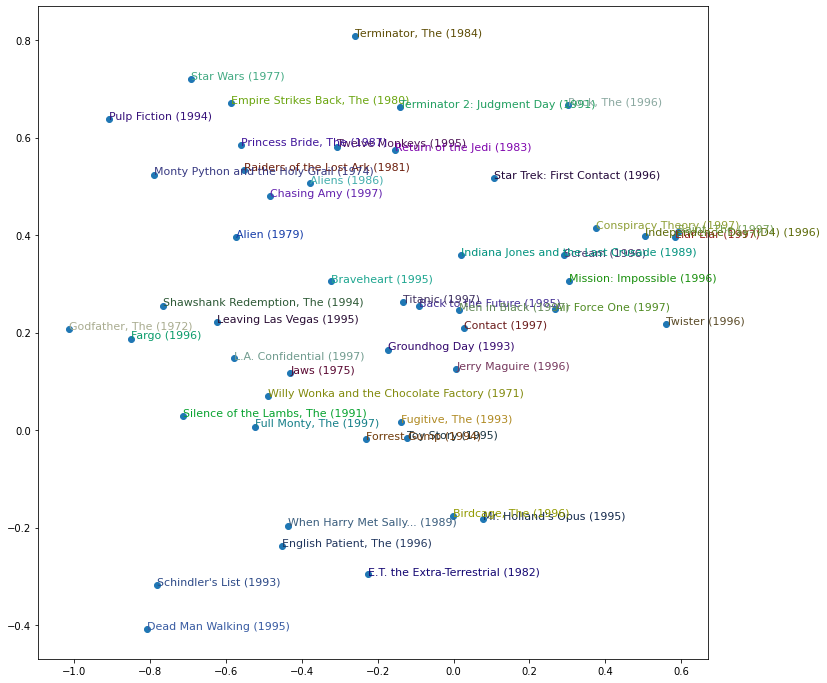

In [ ]:
# Con esto podemos observar, mas menos, como se da esta relacion entre los factores
# latentes con las distintas peliculas, asi las que se encuentran mas cercanas
# podrian compartir algun genero en particular.
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = ([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## **Usando fastai.collab**

In [ ]:
# Ahora que ya conocemos el procedimiento basico, es que podemos volver a utilzar
# Los atajos que nos proporciona la biblioteca de fastai
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.961170,0.950290,00:08
1,0.854235,0.873218,00:08
2,0.741331,0.833566,00:08
3,0.596551,0.820317,00:08
4,0.486857,0.822143,00:08


In [ ]:
# Asi podemos ver en embedding
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [ ]:
# Mismo analisis para las mejores peliculas
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['L.A. Confidential (1997)',
 'Titanic (1997)',
 'Silence of the Lambs, The (1991)',
 "Schindler's List (1993)",
 'Shawshank Redemption, The (1994)']

In [ ]:
# Este analisis sirve para hacer una recomendacion en base a una pelicula que se 
# acaba de ver (se busca la pelicula que tiene una menor distancia)
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Affair to Remember, An (1957)'

### **Deep Learning for Collaborative Filtering**

Este enfoque es por si en lugar de utilizar el producto punto entre los factores latentes, decidimos utilizar un metodo de aprendizaje profundo. (es mas similar a lo que hemos estado hacciendo en el resto de los notebooks)

In [ ]:
# Este metodo nos entrega recomendaciones en relacion a cuantos factores latentes
# ocupar para los usuarios y para los items (peliculas para este caso)
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [ ]:
# Como en este caso vamos a utilzar una red neuronal, debemos definir la estructura
# que tendra esta. 
## Notar que entra un tensor de tamaño (74 + 102 x 100 -> Relu -> 100 x 1) 
## para todos los 64 elementos del batch


class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [ ]:
# Para dejar mas claro este recorrido, hagamos pasar un batch por el modelo 
# y veamos que nos devuelve

# generamos un batch
x, y = dls.one_batch()
print('Esta es la estructura del batch: ', x.shape)

# generamos los factores de los usuarios (ojo, estoy usando los recomendados)
user_factors = Embedding(944, 74)

# generamos los factores de los items (peliculas)
item_factors = Embedding(1665, 102)

# ahora hacemos pasar el batch por los embeddings
embs = user_factors(x[:,0]), item_factors(x[:,1])         

# ahora generemos el tensor que va a recorrer el modelo
x_entra = torch.cat(embs, dim=1)
print('Con esta estructura entra la modelo: ', x_entra.shape)

# ahora lo hacemos pasar lor el primer recorrido
etapa1 = nn.Linear(176, 100)
funcion_activacion = nn.ReLU()
x_etapa1 = funcion_activacion(etapa1(x_entra))
print('Asi queda luego de la primera capa: ', x_etapa1.shape)

# ahora vamos por la segunda capa
etapa2 = nn.Linear(100, 1)
x_etapa2 = etapa2(x_etapa1)
print('Asi queda luego de la segunda capa: ', x_etapa2.shape)

# por ultimo se aplica la sigmoide con las cotas modificadas (y_range)
x_final = sigmoid_range(x_etapa2, low=0, high=5.5)
print('Esta es la estructura de salida: ', x_final.shape)
print(x_final[:10])


Esta es la estructura del batch:  torch.Size([64, 2])
Con esta estructura entra la modelo:  torch.Size([64, 176])
Asi queda luego de la primera capa:  torch.Size([64, 100])
Asi queda luego de la segunda capa:  torch.Size([64, 1])
Esta es la estructura de salida:  torch.Size([64, 1])
tensor([[2.6880],
        [2.6850],
        [2.6835],
        [2.6881],
        [2.6866],
        [2.6872],
        [2.6879],
        [2.6828],
        [2.6916],
        [2.6791]], grad_fn=<SliceBackward>)


In [ ]:
# Ahora que sabemos como es la pasada por el modelo, podemos entrenarlo.
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.926338,0.961950,00:10
1,0.901816,0.910675,00:10
2,0.851982,0.890656,00:10
3,0.816303,0.873657,00:10
4,0.764312,0.875695,00:10


In [ ]:
# Esto es para hacerlo mediante los metodos que nos facilita fastai
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.980071,0.974163,00:12
1,0.913792,0.919904,00:12
2,0.892764,0.891102,00:12
3,0.831222,0.861914,00:12
4,0.761098,0.863395,00:11
